# BREAST Cancer - No Feature Extraction method (NFE) on selected features - Classification

In [1]:
#Import packages
import pandas as pd
import numpy as np

#import xgboost
from xgboost import XGBClassifier

#import sklearn 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import *
from sklearn import metrics

import shap

import os

import  warnings
warnings.filterwarnings('ignore')

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


## Preprocessing of data 

### Load data and Declare feature vector and target variable

In [2]:
df = pd.read_csv("/Users/justine_labory/Desktop/github/plantnet/Metabolomic_project/breast_project/data/BREAST_T.Feat.Select.csv")
X=df.drop("Label", axis=1)
y=df["Label"]

In [3]:
X.head()

,2-aminoadipic acid,2-hydroxyglutaric acid,2-hydroxyvaleric acid,3-phosphoglycerate,5'-deoxy-5'-methylthioadenosine,adenine,alanine,alpha ketoglutaric acid,arachidonic acid,asparagine,...,pseudo uridine,"pyrazine 2,5-dihydroxy NIST",serine,threonic acid,tocopherol beta NIST,trehalose,uracil,urea,uridine-5'-monophosphate,xanthine
0,11.218484,12.234127,14.627043,11.240295,7.469402,10.634814,18.569956,7.914542,13.547547,13.614899,...,10.625744,13.676583,17.801645,15.081775,10.661051,13.176623,15.026577,17.861534,7.367381,8.944028
1,10.547373,13.568694,16.712891,9.966878,8.565162,10.472053,17.759883,9.912328,13.085338,14.900815,...,10.267776,11.766950,16.496363,12.888857,12.070156,11.458791,14.627023,18.212003,7.969552,8.477699
2,10.040969,15.332380,15.050071,10.822742,10.237250,10.970557,18.998509,9.128378,14.214631,14.434673,...,10.885422,15.067266,17.275372,13.398854,10.146258,11.289519,16.274211,18.011109,8.158895,12.609300
3,8.797349,12.440414,17.579449,10.962875,9.508391,10.779951,17.632469,10.437247,12.309697,15.936549,...,11.216703,9.651918,16.354930,13.499308,10.254982,13.753774,13.580863,18.480319,8.414879,9.401940
4,10.764847,13.155491,14.434416,10.727356,8.483125,9.839412,18.294247,8.032057,13.679328,14.317673,...,10.998308,14.420796,17.625011,14.757458,12.648128,11.772042,15.973334,19.110742,7.679578,9.202908


In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

### Run XGBoost model with cross validation

In [5]:
# Define the number of splits and the number of repeats
n_splits = 4
n_repeats = 5

[[10  7]
 [ 2 49]]
0.8676470588235294
0.7745098039215687
0.9158878504672897
0.875
0.9607843137254902
0.8881199538638985


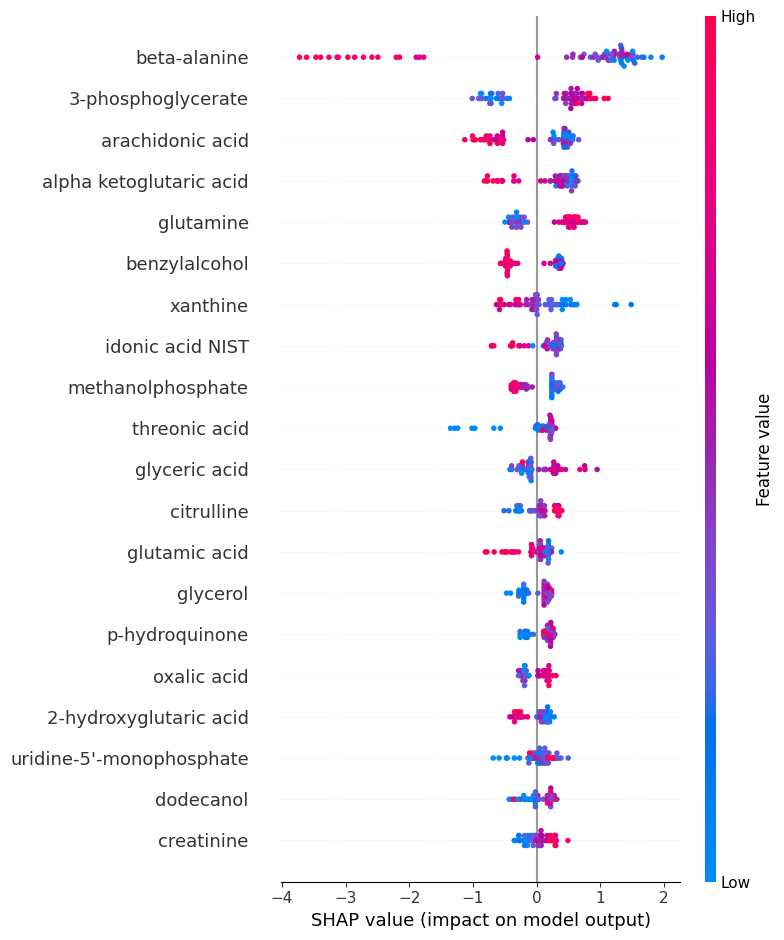

[[11  6]
 [ 1 50]]
0.8970588235294118
0.8137254901960784
0.9345794392523364
0.8928571428571429
0.9803921568627451
0.8650519031141869


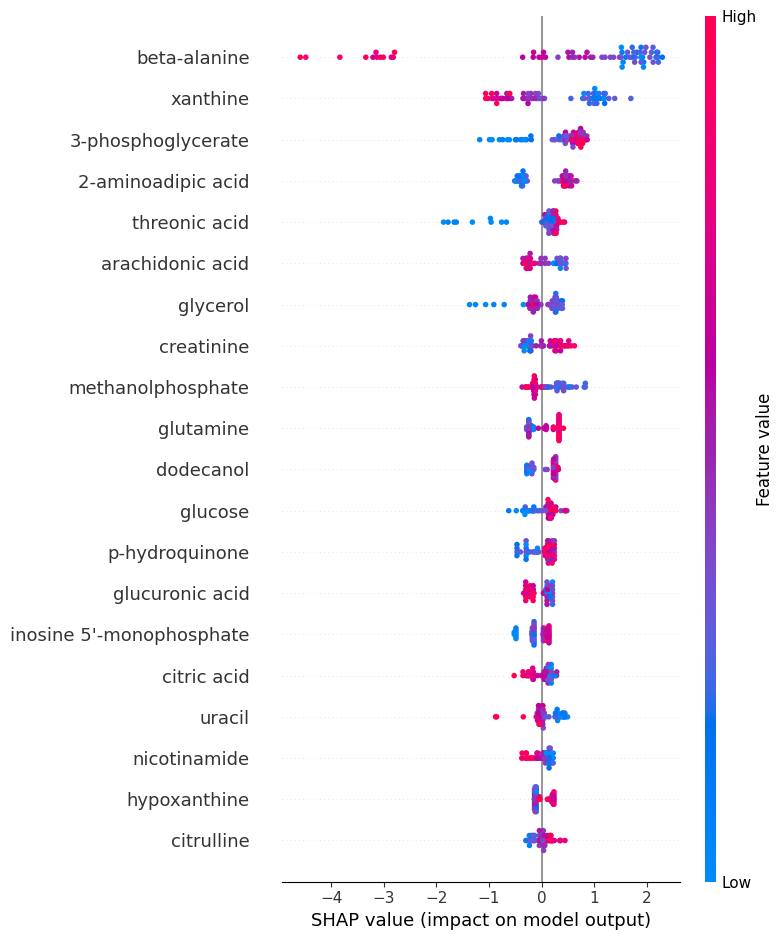

[[13  4]
 [ 6 45]]
0.8529411764705882
0.8235294117647058
0.9
0.9183673469387755
0.8823529411764706
0.8754325259515571


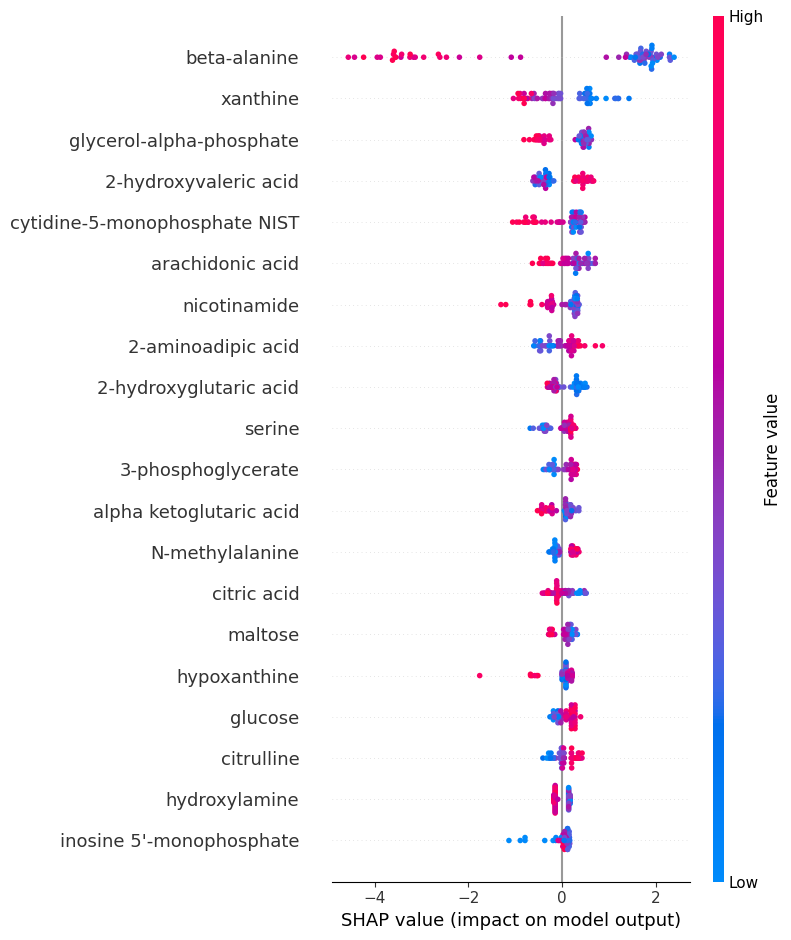

[[ 8  8]
 [ 2 49]]
0.8507462686567164
0.7303921568627452
0.9074074074074074
0.8596491228070176
0.9607843137254902
0.8897058823529411


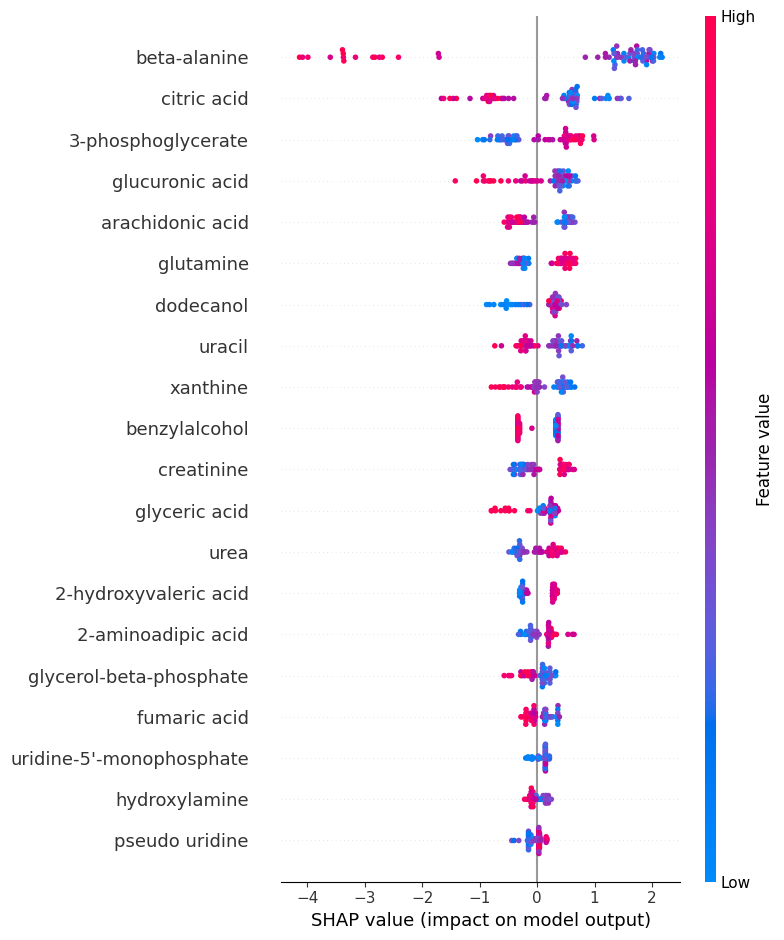

[[11  6]
 [ 3 48]]
0.8676470588235294
0.7941176470588236
0.9142857142857143
0.8888888888888888
0.9411764705882353
0.8823529411764706


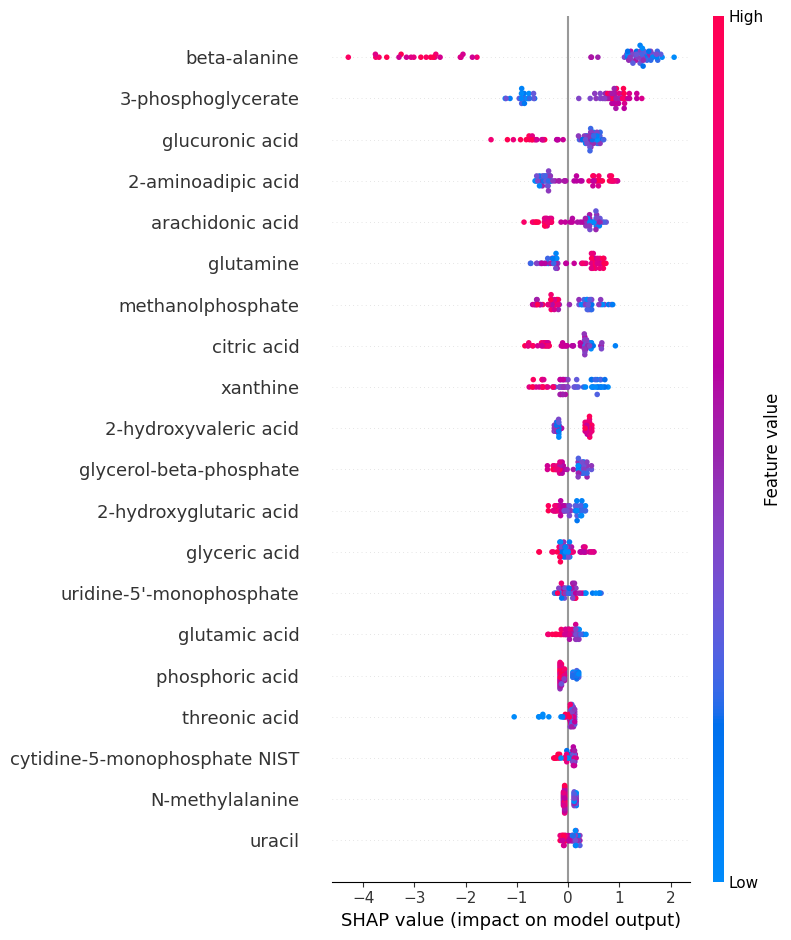

[[13  4]
 [ 2 49]]
0.9117647058823529
0.8627450980392157
0.9423076923076923
0.9245283018867925
0.9607843137254902
0.9319492502883506


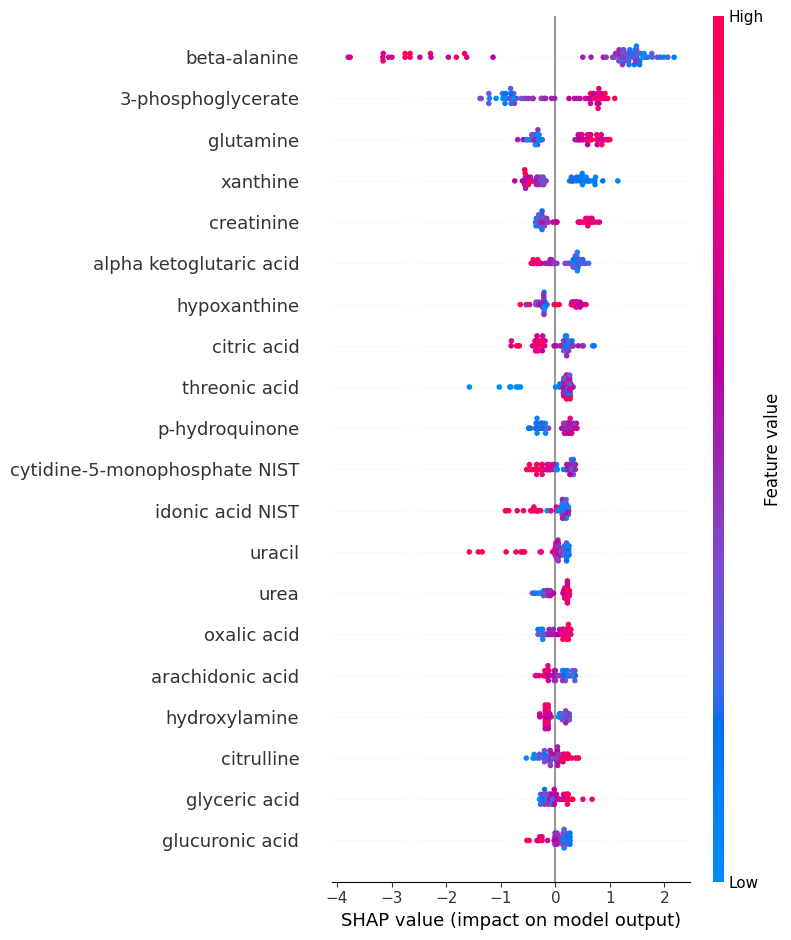

[[13  4]
 [ 5 46]]
0.8676470588235294
0.8333333333333333
0.9108910891089109
0.92
0.9019607843137255
0.9146482122260668


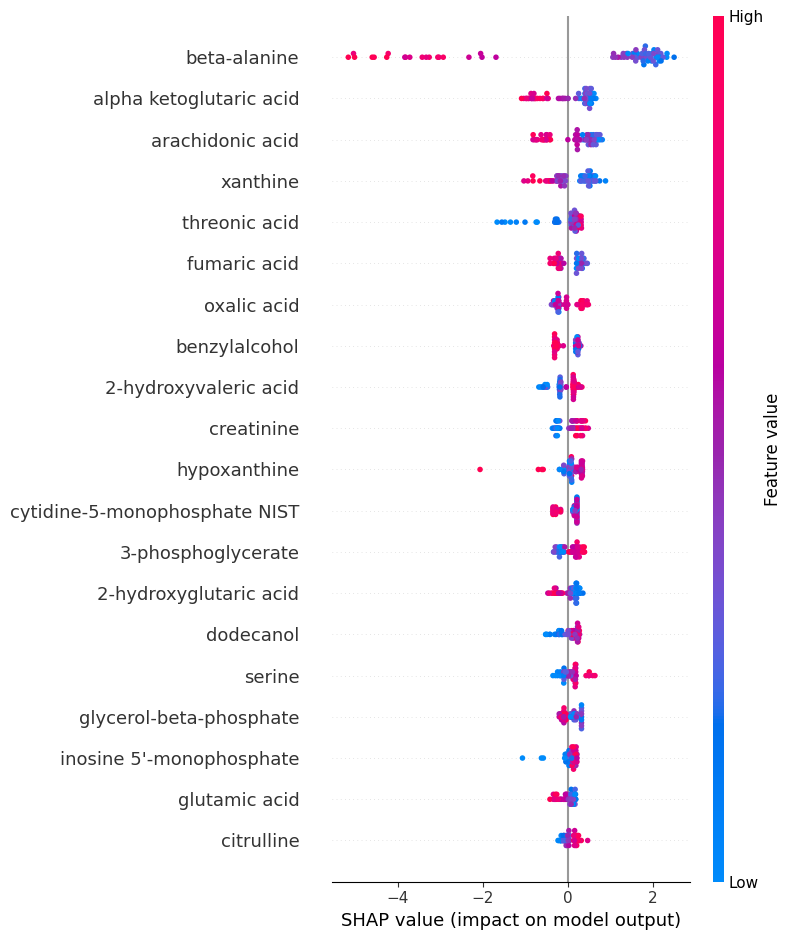

[[ 8  8]
 [ 3 48]]
0.835820895522388
0.7205882352941176
0.897196261682243
0.8571428571428571
0.9411764705882353
0.8235294117647058


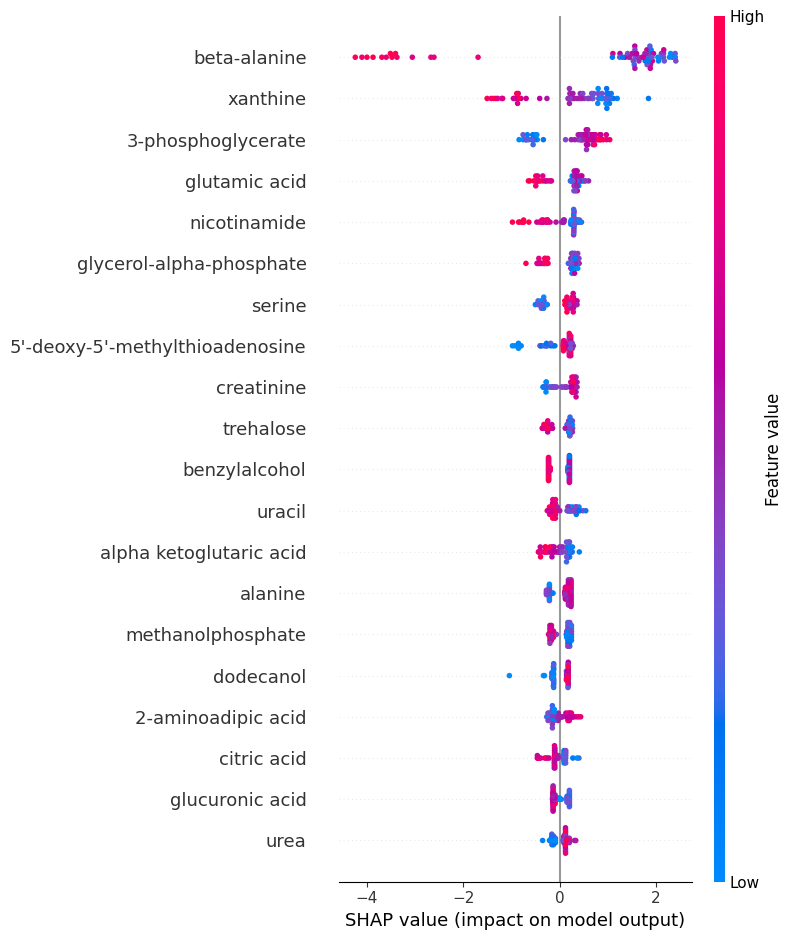

[[11  6]
 [ 2 49]]
0.8823529411764706
0.803921568627451
0.9245283018867925
0.8909090909090909
0.9607843137254902
0.9042675893886967


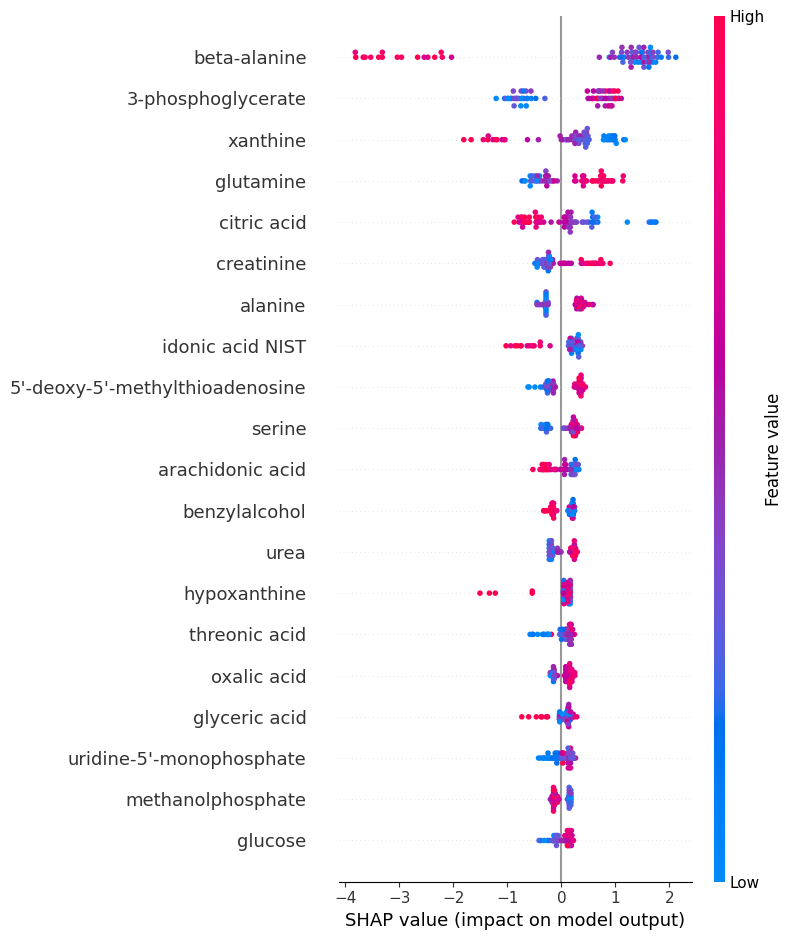

[[13  4]
 [ 5 46]]
0.8676470588235294
0.8333333333333333
0.9108910891089109
0.92
0.9019607843137255
0.8904267589388696


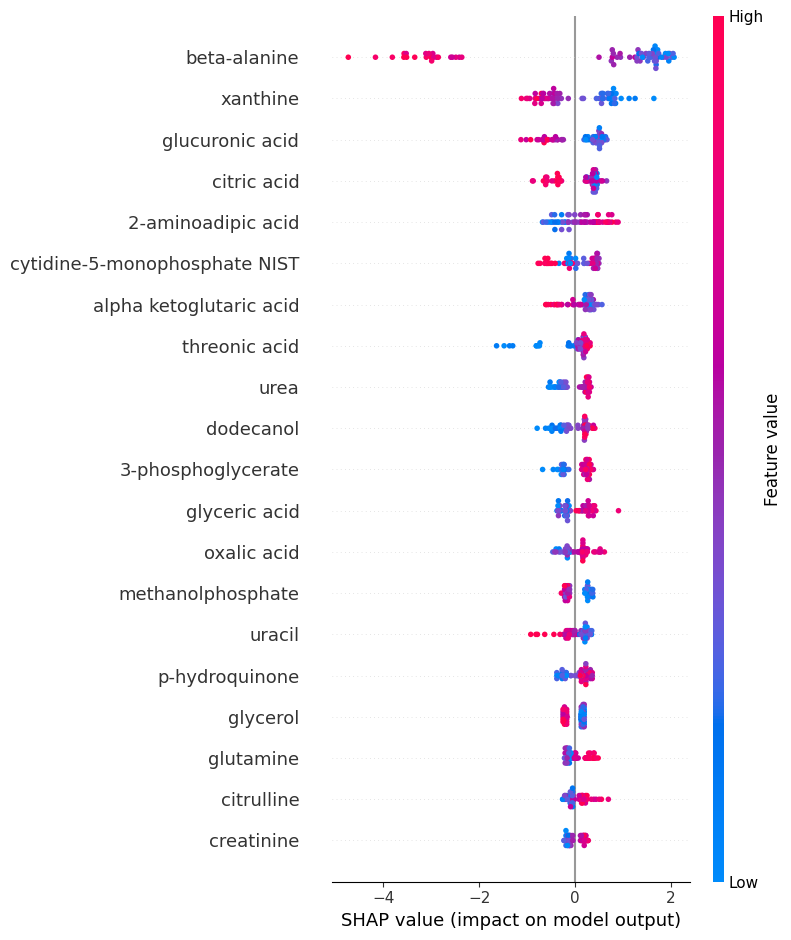

[[11  6]
 [ 4 47]]
0.8529411764705882
0.7843137254901961
0.9038461538461539
0.8867924528301887
0.9215686274509803
0.8292964244521337


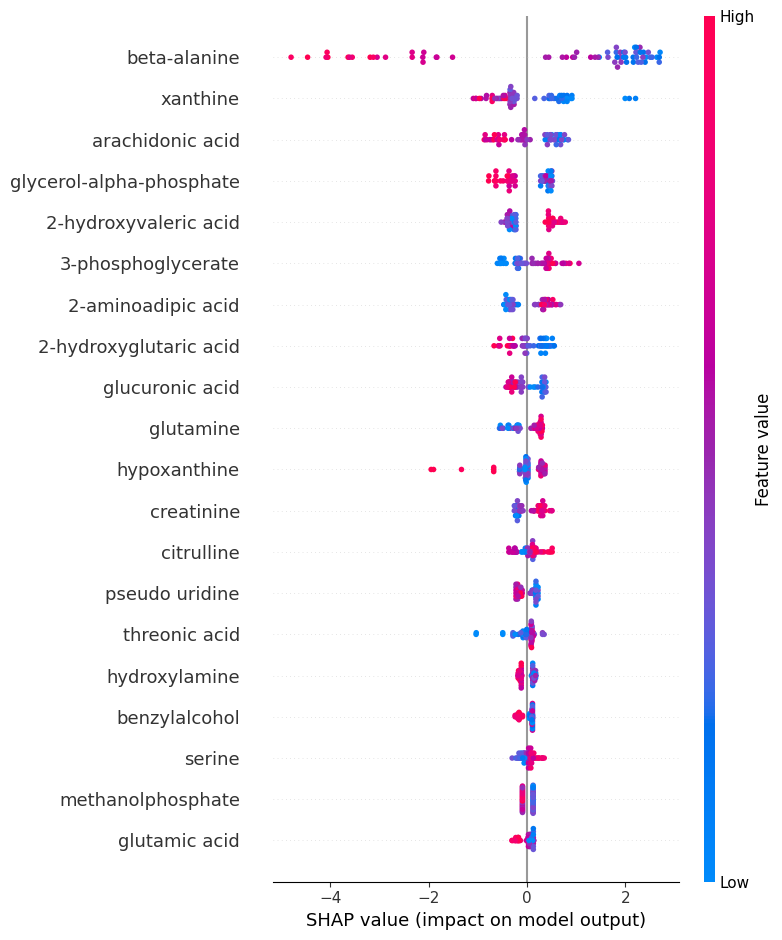

[[ 9  7]
 [ 1 50]]
0.8805970149253731
0.7714460784313726
0.9259259259259259
0.8771929824561403
0.9803921568627451
0.857843137254902


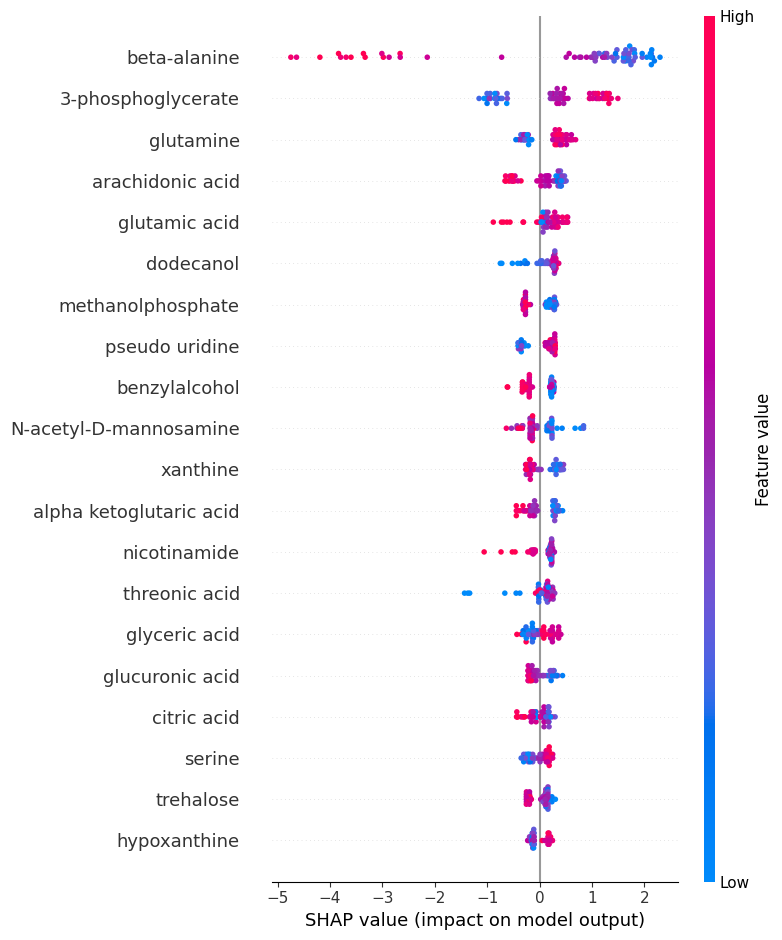

[[13  4]
 [ 3 48]]
0.8970588235294118
0.8529411764705882
0.9320388349514563
0.9230769230769231
0.9411764705882353
0.8638985005767013


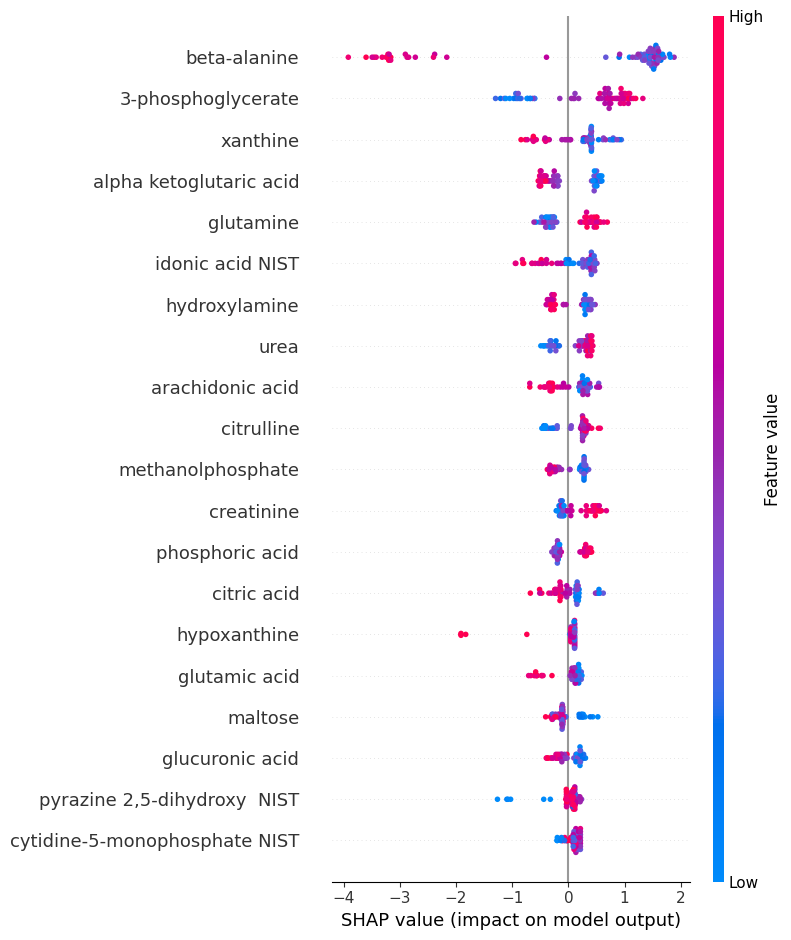

[[13  4]
 [ 4 47]]
0.8823529411764706
0.8431372549019607
0.9215686274509803
0.9215686274509803
0.9215686274509803
0.8869665513264129


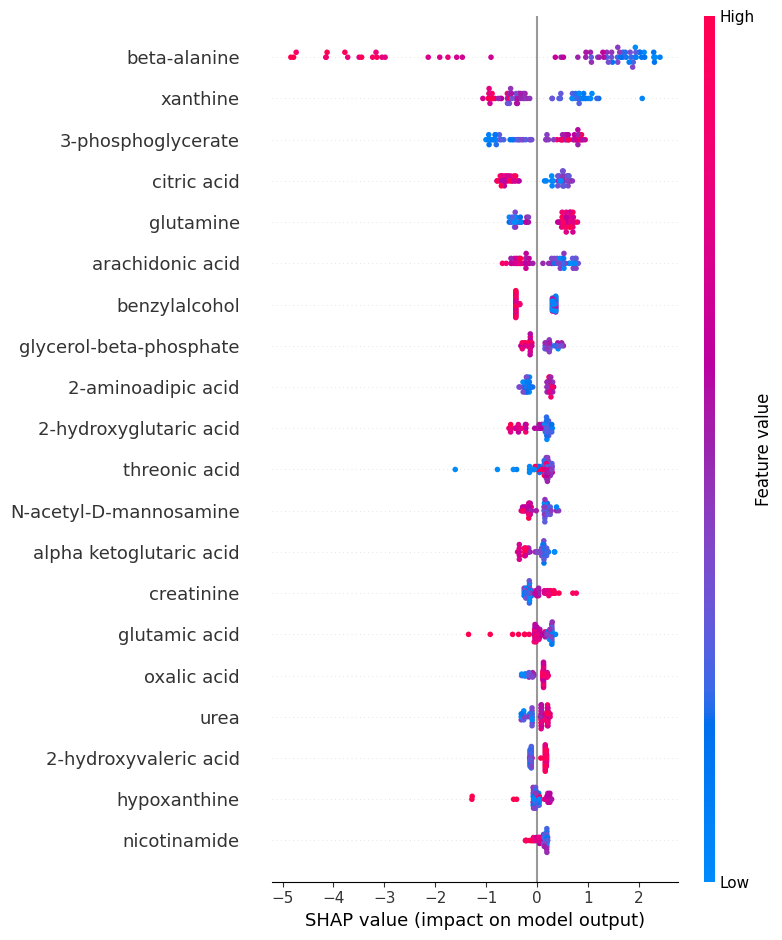

[[ 9  8]
 [ 4 47]]
0.8235294117647058
0.7254901960784313
0.8867924528301887
0.8545454545454545
0.9215686274509803
0.8754325259515571


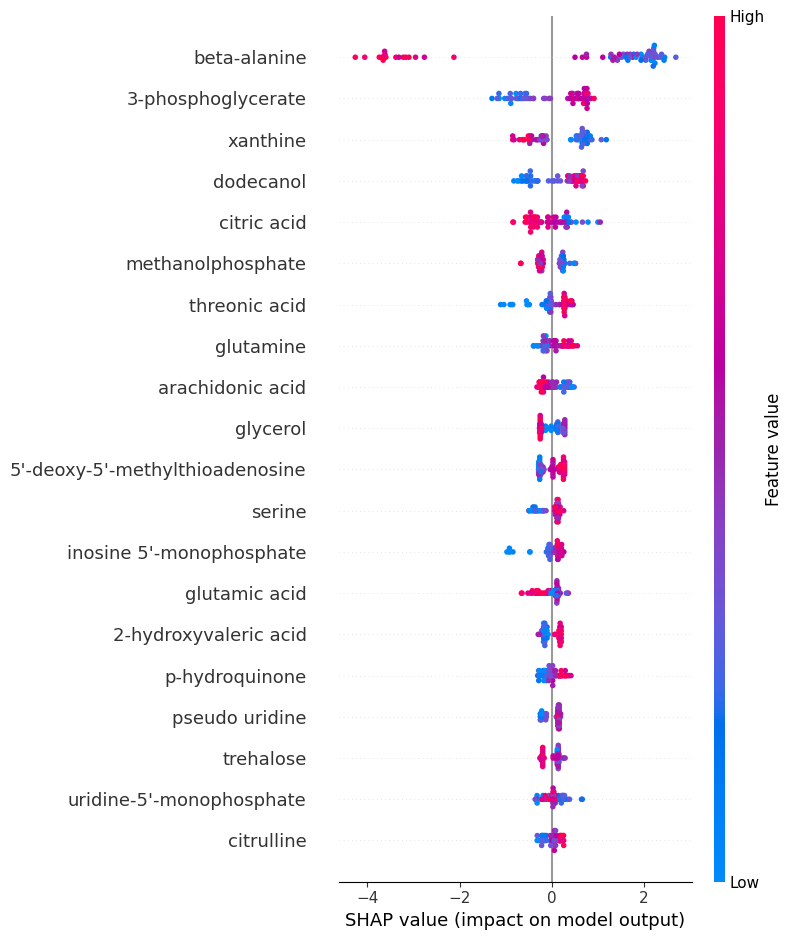

[[11  5]
 [ 2 49]]
0.8955223880597015
0.8241421568627452
0.9333333333333333
0.9074074074074074
0.9607843137254902
0.9080882352941175


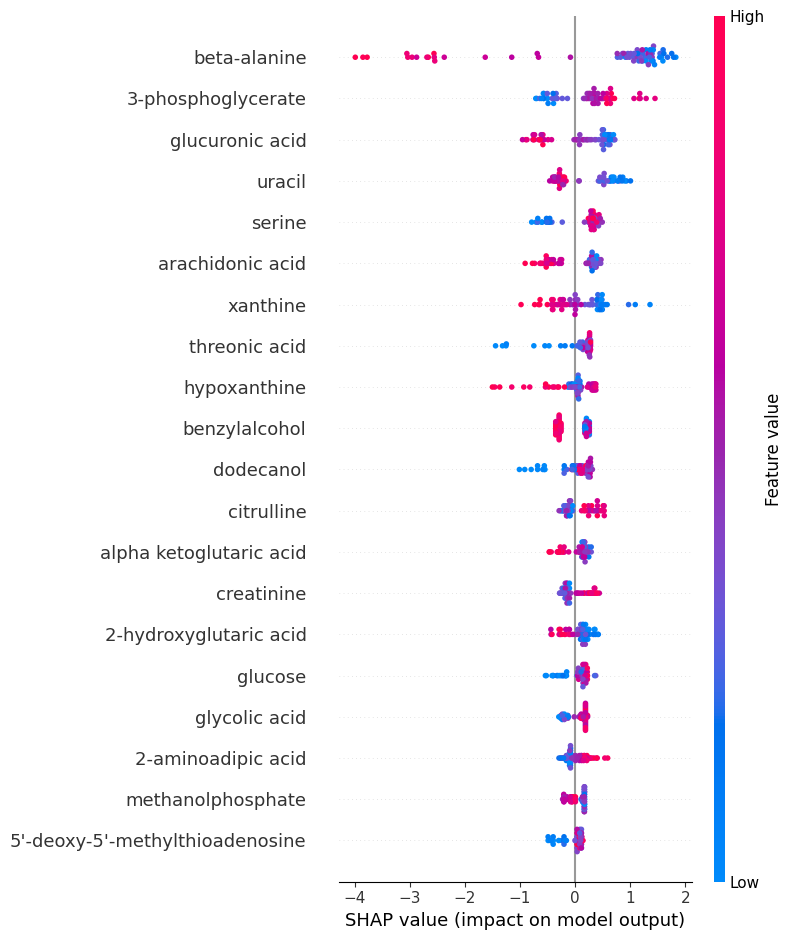

[[15  2]
 [ 2 49]]
0.9411764705882353
0.9215686274509804
0.9607843137254902
0.9607843137254902
0.9607843137254902
0.9354094579008074


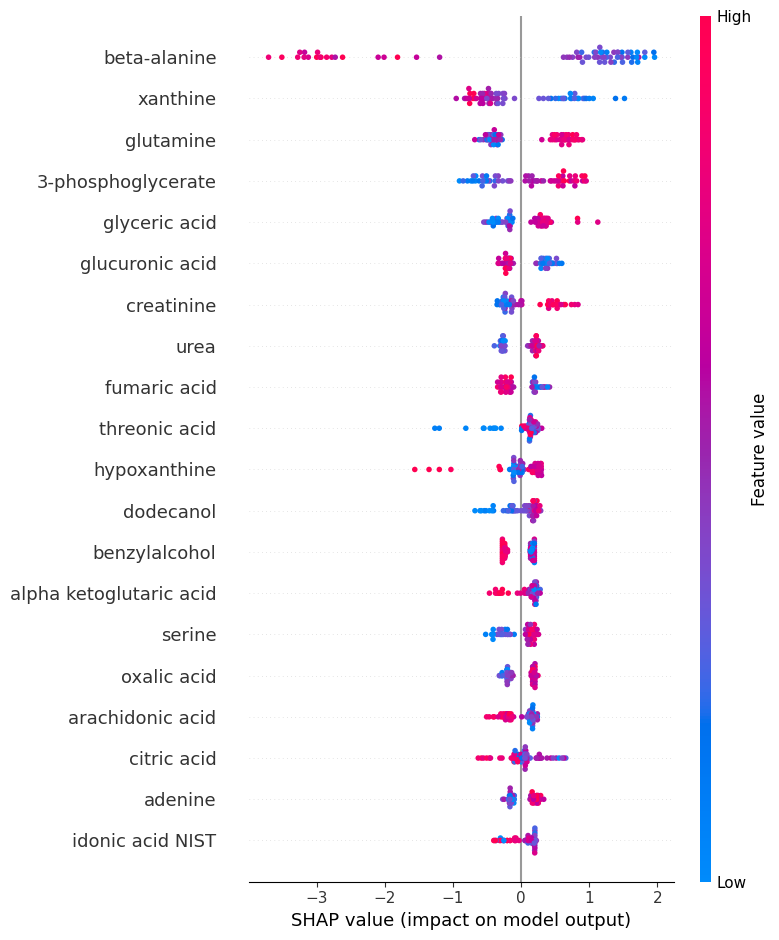

[[13  4]
 [ 4 47]]
0.8823529411764706
0.8431372549019607
0.9215686274509803
0.9215686274509803
0.9215686274509803
0.9538638985005767


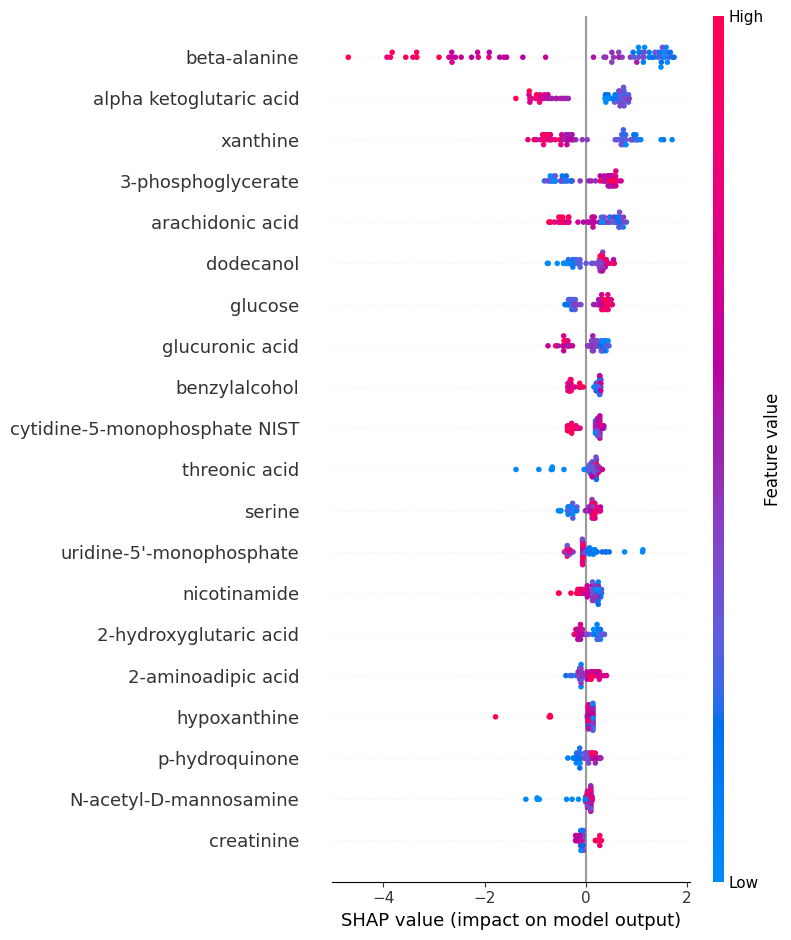

[[ 9  8]
 [ 4 47]]
0.8235294117647058
0.7254901960784313
0.8867924528301887
0.8545454545454545
0.9215686274509803
0.803921568627451


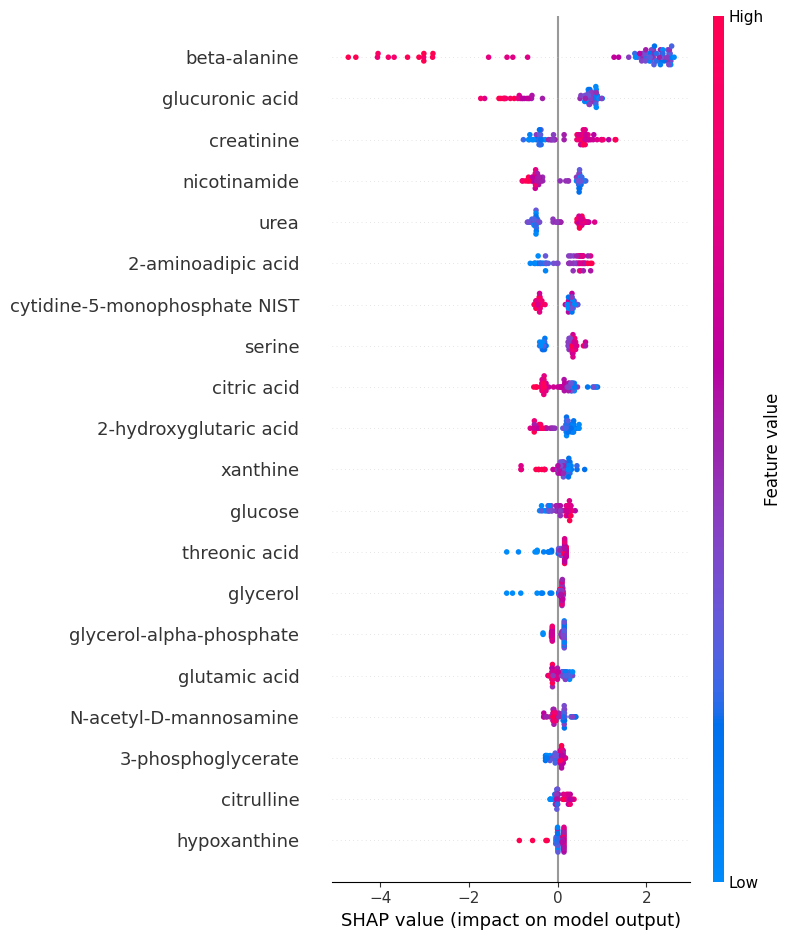

[[ 9  7]
 [ 2 49]]
0.8656716417910447
0.7616421568627452
0.9158878504672897
0.875
0.9607843137254902
0.8541666666666667


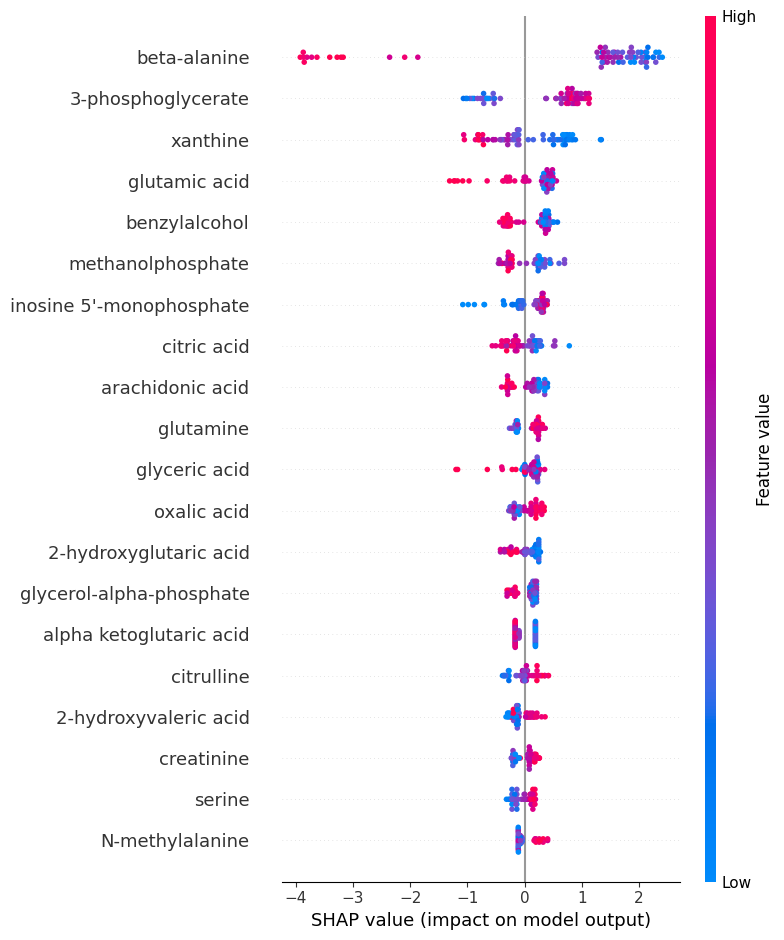

In [6]:
rkf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=0)

df_metrics = pd.DataFrame(columns=['accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1score',
                                   'roc_auc', 'specificity'],
                         index = ['fold' + str(x) for x in range(1,(n_splits*n_repeats +1))])


for i, (train_index, test_index) in enumerate(rkf.split(X,y)):
    
    X_train=X.iloc[train_index]
    y_train=y.iloc[train_index]
    X_test=X.iloc[test_index]
    y_test=y.iloc[test_index]


    xgboost = XGBClassifier(seed=1234)

    xgboost = xgboost.fit(X_train,y_train)
    y_pred_proba = xgboost.predict_proba(X_test)[:,1]
    # # Get predicted probability
    y_pred = xgboost.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    tp = cm[1, 1]
    
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1score = metrics.f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    spe= tn / (tn + fp)
    
    # Fill in the dataframe with metrics
    df_metrics.iloc[i] = [acc, bal_acc, f1score, precision, recall, roc_auc, spe]
    
    print(acc)
    print(bal_acc)
    print(f1score)
    print(precision)
    print(recall)
    print(roc_auc)

#     Add feature importance with SHAP

    explainer = shap.TreeExplainer(xgboost)
    shap_values = explainer.shap_values(X_test)
    #shap.summary_plot(shap_values, X_test, plot_type="bar")
    shap.summary_plot(shap_values, X_test)

In [7]:
df_metrics

,accuracy,balanced_accuracy,precision,recall,f1score,roc_auc,specificity
fold1,0.867647,0.77451,0.915888,0.875,0.960784,0.88812,0.588235
fold2,0.897059,0.813725,0.934579,0.892857,0.980392,0.865052,0.647059
fold3,0.852941,0.823529,0.9,0.918367,0.882353,0.875433,0.764706
fold4,0.850746,0.730392,0.907407,0.859649,0.960784,0.889706,0.5
fold5,0.867647,0.794118,0.914286,0.888889,0.941176,0.882353,0.647059
fold6,0.911765,0.862745,0.942308,0.924528,0.960784,0.931949,0.764706
fold7,0.867647,0.833333,0.910891,0.92,0.901961,0.914648,0.764706
fold8,0.835821,0.720588,0.897196,0.857143,0.941176,0.823529,0.5
fold9,0.882353,0.803922,0.924528,0.890909,0.960784,0.904268,0.647059
fold10,0.867647,0.833333,0.910891,0.92,0.901961,0.890427,0.764706


## Compute mean and standard deviation of metrics

In [8]:
print(f'The mean accuracy is: {np.mean(df_metrics["accuracy"])*100:.1f} (±{np.std(df_metrics["accuracy"])*100:.1f}) ')
print(f'The mean balanced accuracy is: {np.mean(df_metrics["balanced_accuracy"])*100:.1f} (±{np.std(df_metrics["balanced_accuracy"])*100:.1f}) ')
print(f'The mean precision is: {np.mean(df_metrics["precision"])*100:.1f} (±{np.std(df_metrics["precision"])*100:.1f}) ')
print(f'The mean recall is: {np.mean(df_metrics["recall"])*100:.1f} (±{np.std(df_metrics["recall"])*100:.1f}) ')
print(f'The mean F1 score is: {np.mean(df_metrics["f1score"])*100:.1f} (±{np.std(df_metrics["f1score"])*100:.1f}) ')
print(f'The mean ROC AUC is: {np.mean(df_metrics["roc_auc"])*100:.1f} (±{np.std(df_metrics["roc_auc"])*100:.1f}) ')
print(f'The mean specificity is: {np.mean(df_metrics["specificity"])*100:.1f} (±{np.std(df_metrics["specificity"])*100:.1f}) ')

The mean accuracy is: 87.2 (±2.8) 
The mean balanced accuracy is: 80.2 (±5.2) 
The mean precision is: 91.7 (±1.8) 
The mean recall is: 89.6 (±2.9) 
The mean F1 score is: 94.0 (±2.7) 
The mean ROC AUC is: 88.2 (±3.7) 
The mean specificity is: 66.4 (±10.9) 


## Compute 95% CI

In [9]:
acc_ci= np.percentile(df_metrics["accuracy"], [2.5,97.5])
bal_acc_ci= np.percentile(df_metrics["balanced_accuracy"], [2.5,97.5])
precision_ci = np.percentile(df_metrics["precision"], [2.5,97.5])
recall_ci= np.percentile(df_metrics["recall"], [2.5,97.5])
f1_ci = np.percentile(df_metrics["f1score"], [2.5,97.5])
roc_auc_ci = np.percentile(df_metrics["roc_auc"], [2.5,97.5])
specificity_ci = np.percentile(df_metrics['specificity'], [2.5,97.5])

print(f'The confidence interval for accuracy is [{acc_ci[0]*100:.1f} ; {acc_ci[1]*100:.1f}]')
print(f'The confidence interval for balanced accucary is [{bal_acc_ci[0]*100:.1f} ; {bal_acc_ci[1]*100:.1f}]')
print(f'The confidence interval for precision is [{precision_ci[0]*100:.1f} ; {precision_ci[1]*100:.1f}]')
print(f'The confidence interval for recall is [{recall_ci[0]*100:.1f} ; {recall_ci[1]*100:.1f}]')
print(f'The confidence interval for F1 score is [{f1_ci[0]*100:.1f} ; {f1_ci[1]*100:.1f}]')
print(f'The confidence interval for ROC AUC score is [{roc_auc_ci[0]*100:.1f} ; {roc_auc_ci[1]*100:.1f}]')
print(f'The confidence interval for specificity score is [{specificity_ci[0]*100:.1f} ; {specificity_ci[1]*100:.1f}]')

The confidence interval for accuracy is [82.4 ; 92.7]
The confidence interval for balanced accucary is [72.3 ; 89.4]
The confidence interval for precision is [88.7 ; 95.2]
The confidence interval for recall is [85.5 ; 94.4]
The confidence interval for F1 score is [89.2 ; 98.0]
The confidence interval for ROC AUC score is [81.3 ; 94.5]
The confidence interval for specificity score is [50.0 ; 82.6]
